# Digital Economy and Data Analytics (Assigment 1)

Link to the dataset: https://www.kaggle.com/datasets/aslanahmedov/walmart-sales-forecast/data

In [24]:
from google.colab import drive # initial set-up of the environment
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/DEDA')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
import pandas as pd # import the used libraries within the collab
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sk_metrics
import tempfile
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)

In [26]:
# we read the tables from the dataset
features = pd.read_csv('data/features.csv')
stores = pd.read_csv('data/stores.csv')
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [27]:
train_test = train.append(test, ignore_index=True)
print(train_test.shape)
train_test.head()
train_test.isna().sum()

(536634, 5)


<ipython-input-27-9d46458cae84>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_test = train.append(test, ignore_index=True)


Store                0
Dept                 0
Date                 0
Weekly_Sales    115064
IsHoliday            0
dtype: int64

In [28]:
# we check for the shape of the tables and see how the data looks like
print(features.shape)
features.head()

(8190, 12)


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [29]:
print(stores.shape)
stores.head()

(45, 3)


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [30]:
print(train.shape)
train.head()

(421570, 5)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [31]:
print(test.shape)
test.head()

(115064, 4)


,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [32]:
features_2 = pd.read_csv('data_2/features.csv')
stores_2 = pd.read_csv('data_2/stores.csv')
train_2 = pd.read_csv('data_2/train.csv')
test_2 = pd.read_csv('data_2/test.csv')
sampleSubmission = pd.read_csv('data_2/sampleSubmission.csv')

In [33]:
print(features_2.shape)
print(stores_2.shape)
print(train_2.shape)
print(test_2.shape)
print(sampleSubmission.shape)

(8190, 12)
(45, 3)
(421570, 5)
(115064, 4)
(115064, 2)


In [34]:
sampleSubmission.head()

,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0


In [35]:
# Markdown is an atttribute that doesn't have a clear explanation, but we find that it is useful to consider in the analysis.
print(features['MarkDown1'].unique())
print(features['MarkDown2'].unique())
print(features['MarkDown3'].unique())
print(features['MarkDown4'].unique())
print(features['MarkDown5'].unique())

[     nan 10382.9   6074.12 ...  3789.94  2961.49   212.02]
[    nan 6115.67  254.39 ... 1827.31 1047.07  851.73]
[   nan 215.07  51.98 ...  85.72 204.19   2.06]
[    nan 2406.62  427.39 ...  744.84  363.     10.88]
[    nan 6551.42 5988.57 ... 2150.36 1059.46 1864.57]


# Data Cleaning and Preprocessing

We start by analysing the missing values within our tables.

In [36]:
print(f"The shape of the frame is: {features.shape[0]}")
nan_values = features.isna().sum()
if np.any(nan_values):
    print("There are missing values in the dataframe:")
    print(nan_values)
else:
    print("No missing values found in the dataframe.")

The shape of the frame is: 8190
There are missing values in the dataframe:
Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64


In [37]:
print(f"The shape of the stores frame is: {stores.shape[0]}")
nan_values = stores.isna().sum()
if np.any(nan_values):
    print("There are missing values in the dataframe:")
    print(nan_values)
else:
    print("No missing values found in the dataframe.")

The shape of the stores frame is: 45
No missing values found in the dataframe.


In [38]:
print(f"The shape of the train is: {train.shape[0]}")
nan_values = train.isna().sum()
if np.any(nan_values):
    print("There are missing values in the dataframe:")
    print(nan_values)
else:
    print("No missing values found in the dataframe.")
print(f"The shape of the test is: {test.shape[0]}")
nan_values = test.isna().sum()
if np.any(nan_values):
    print("There are missing values in the dataframe:")
    print(nan_values)
else:
    print("No missing values found in the dataframe.")

The shape of the train is: 421570
No missing values found in the dataframe.
The shape of the test is: 115064
No missing values found in the dataframe.


In [39]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


By looking in the table, we can observe there are no obvious outliers or wrong values.

In [40]:
stores.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


An important observation is that the Weekly_Sales has negative values, which is counter intuitive.

In [41]:
train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [42]:
train["Store"].value_counts()

13    10474
10    10315
4     10272
1     10244
2     10238
24    10228
27    10225
34    10224
20    10214
6     10211
32    10202
19    10148
31    10142
28    10113
41    10088
11    10062
23    10050
14    10040
40    10017
15     9901
8      9895
39     9878
17     9864
18     9859
26     9854
25     9804
7      9762
12     9705
22     9688
45     9637
21     9582
35     9528
29     9455
16     9443
3      9036
5      8999
9      8867
38     7362
37     7206
44     7169
30     7156
42     6953
43     6751
33     6487
36     6222
Name: Store, dtype: int64

In the train table, there are the results for multiple stores and these multiple stores have their own department and for the combination of Store, Dept and Week there is an entry

In [43]:
train["Dept"].value_counts()

1     6435
16    6435
92    6435
38    6435
40    6435
      ... 
78     235
77     150
65     143
39      16
43      12
Name: Dept, Length: 81, dtype: int64

In [44]:
merged_stores_features = pd.merge(features, stores, on='Store', how='left')
print(merged_stores_features.shape)
merged_stores_features.head()

(8190, 14)


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


# Data Visualisation and Feature Engineering

In [45]:
merged_stores_features_train = pd.merge(merged_stores_features, train_test, on=['Store', 'Date', 'IsHoliday'], how='right')
merged_stores_features_train.head()
print(merged_stores_features_train.shape)

(536634, 16)


We create the feature called "DateMonth", which represents the month obtained from the "Date" variable.

   Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0      1 2010-02-05        42.31       2.572        NaN        NaN        NaN   
1      1 2010-02-12        38.51       2.548        NaN        NaN        NaN   
2      1 2010-02-19        39.93       2.514        NaN        NaN        NaN   
3      1 2010-02-26        46.63       2.561        NaN        NaN        NaN   
4      1 2010-03-05        46.50       2.625        NaN        NaN        NaN   

   MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday Type    Size  \
0        NaN        NaN  211.096358         8.106      False    A  151315   
1        NaN        NaN  211.242170         8.106       True    A  151315   
2        NaN        NaN  211.289143         8.106      False    A  151315   
3        NaN        NaN  211.319643         8.106      False    A  151315   
4        NaN        NaN  211.350143         8.106      False    A  151315   

   Dept  Weekly_Sales  DateMonth  DateYear  DateWe

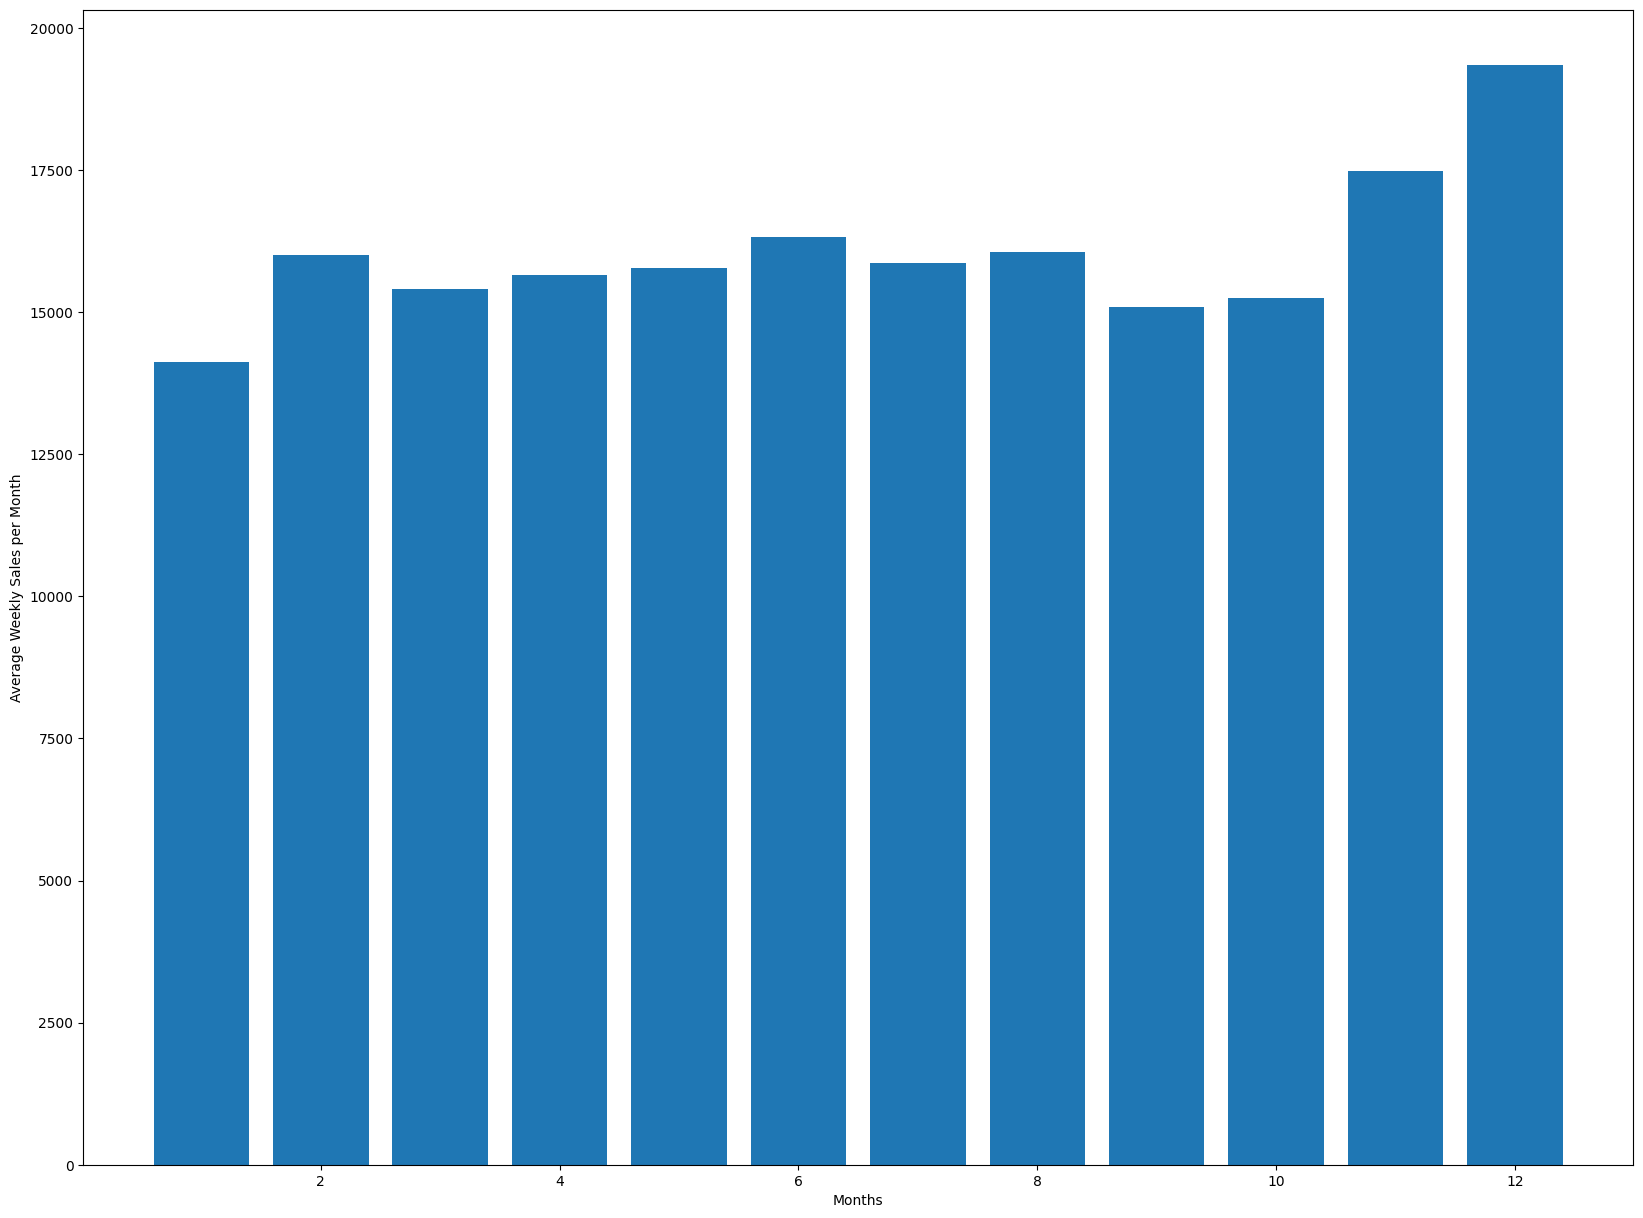

In [46]:
merged_stores_features_train["Date"] = pd.to_datetime(merged_stores_features_train['Date'])
merged_stores_features_train["DateMonth"] = merged_stores_features_train['Date'].dt.month
merged_stores_features_train["DateYear"] = merged_stores_features_train['Date'].dt.year
merged_stores_features_train["DateWeek"] = merged_stores_features_train['Date'].dt.isocalendar().week

print(merged_stores_features_train.head())

list_for_months = list()
list_for_sales = list()
for index in merged_stores_features_train["DateMonth"].unique():
  wk_sales_avg = merged_stores_features_train["Weekly_Sales"][merged_stores_features_train["DateMonth"]==index].mean()
  list_for_months.append(int(index))
  list_for_sales.append(wk_sales_avg)

tryout_df = pd.DataFrame({"Months": list_for_months, "Weekly_Sales": list_for_sales})
tryout_df = tryout_df.sort_values(by = ["Months"])
print(tryout_df)
plt.figure(figsize = (20,15))
plt.xlabel("Months")
plt.ylabel("Average Weekly Sales per Month")

plt.bar(tryout_df["Months"],tryout_df["Weekly_Sales"])
plt.show()

We create 7 new features, based on the markdowns variables, those being:
- MarkDown{i}_bool - it is binary encoded based on if it is nan or it has a value
- MarkDown_all_bool - if all the markdowns are mentioned, it is 1, otherwise it is 0
- MarkDown_sum - the amount of markdowns that are different than nan

In [47]:
## To look at the weekly sales and assess whether the markdown values are affecting them
list_for_differences = list()
for i in range(1,6):
  merged_stores_features_train[f"MarkDown{i}_bool"] = merged_stores_features_train[f"MarkDown{i}"].notna().astype(int)
  merged_stores_features_train[f"MarkDown{i}_bool"].value_counts()
  mean_markdown_T = merged_stores_features_train["Weekly_Sales"][merged_stores_features_train[f"MarkDown{i}_bool"]==1].mean()
  mean_markdown_F = merged_stores_features_train["Weekly_Sales"][merged_stores_features_train[f"MarkDown{i}_bool"]==0].mean()

  print(f'The avg weekly sales if there has been a markdown{i}: {mean_markdown_T}')
  print(f'The avg weekly sales if there has not been a markdown{i}: {mean_markdown_F}')
  list_for_differences.append(mean_markdown_T/mean_markdown_F)

# relative difference of the means
print(f'\nRelative difference in means: {round(np.mean(list_for_differences)-1,5)*100} percent')
merged_stores_features_train["MarkDown_all_bool"] = ((merged_stores_features_train["MarkDown1"].notna() & merged_stores_features_train["MarkDown2"].notna() &
 merged_stores_features_train["MarkDown3"].notna() & merged_stores_features_train["MarkDown4"].notna() & merged_stores_features_train["MarkDown5"].notna())).astype(int)

merged_stores_features_train["MarkDown_sum"] = ((merged_stores_features_train["MarkDown1_bool"] + merged_stores_features_train["MarkDown2_bool"] +
 merged_stores_features_train["MarkDown3_bool"] + merged_stores_features_train["MarkDown4_bool"] + merged_stores_features_train["MarkDown5_bool"])).astype(int)


## finally, looking at the presence of any markdown value
print(f'''Rel. diff. when all markdown values included: {round((merged_stores_features_train["Weekly_Sales"][merged_stores_features_train["MarkDown_all_bool"]].mean()/
      merged_stores_features_train["Weekly_Sales"][merged_stores_features_train["MarkDown_all_bool"]==False].mean()-1)*100,5)} percent''')

The avg weekly sales if there has been a markdown1: 16215.489727371072
The avg weekly sales if there has not been a markdown1: 15850.967663877089
The avg weekly sales if there has been a markdown2: 17051.45964251043
The avg weekly sales if there has not been a markdown2: 15597.599283325053
The avg weekly sales if there has been a markdown3: 16735.87801649999
The avg weekly sales if there has not been a markdown3: 15617.605285275893
The avg weekly sales if there has been a markdown4: 17026.38032096735
The avg weekly sales if there has not been a markdown4: 15489.089487304738
The avg weekly sales if there has been a markdown5: 16177.015243805805
The avg weekly sales if there has not been a markdown5: 15871.522017302268

Relative difference in means: 6.126 percent
Rel. diff. when all markdown values included: 106.20342 percent


Visualisation of data in terms of stores and their changes in values over time.

In [48]:
'''
copy_features = merged_stores_features_train.copy()
copy_features['Date'] = pd.to_datetime(copy_features['Date'])

# Sort the DataFrame by Store and then by Date
copy_features.sort_values(['Store', 'Date'], inplace=True)

# Get unique store IDs
store_ids = copy_features['Store'].unique()

# Generate a color palette
colors = plt.cm.jet(np.linspace(0, 1, len(store_ids)))


for column in copy_features.columns:
  plt.figure(figsize=(20, 15))
  for store_id, color in zip(store_ids, colors):
    store_data = copy_features[copy_features['Store'] == store_id]
    plt.plot(store_data['Date'], store_data[column], color=color, label=f'Store {store_id}')
    # plt.plot(store_data['Date'], store_data[column], color=color)

  plt.ylabel(column)
  plt.title(f"Changes in {column} Over Time")
  plt.xlabel('Date')
  plt.legend()
  plt.grid(True)
  plt.show()
'''

'\ncopy_features = merged_stores_features_train.copy()\ncopy_features[\'Date\'] = pd.to_datetime(copy_features[\'Date\'])\n\n# Sort the DataFrame by Store and then by Date\ncopy_features.sort_values([\'Store\', \'Date\'], inplace=True)\n\n# Get unique store IDs\nstore_ids = copy_features[\'Store\'].unique()\n\n# Generate a color palette\ncolors = plt.cm.jet(np.linspace(0, 1, len(store_ids)))\n\n\nfor column in copy_features.columns:\n  plt.figure(figsize=(20, 15))\n  for store_id, color in zip(store_ids, colors):\n    store_data = copy_features[copy_features[\'Store\'] == store_id]\n    plt.plot(store_data[\'Date\'], store_data[column], color=color, label=f\'Store {store_id}\')\n    # plt.plot(store_data[\'Date\'], store_data[column], color=color)\n\n  plt.ylabel(column)\n  plt.title(f"Changes in {column} Over Time")\n  plt.xlabel(\'Date\')\n  plt.legend()\n  plt.grid(True)\n  plt.show()\n'

Using the correlation matrix, we can understand what data to use in our models and what variables are correlated to our target variable.

<ipython-input-49-b0b6ed56ccfb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_stores_features_train.corr()


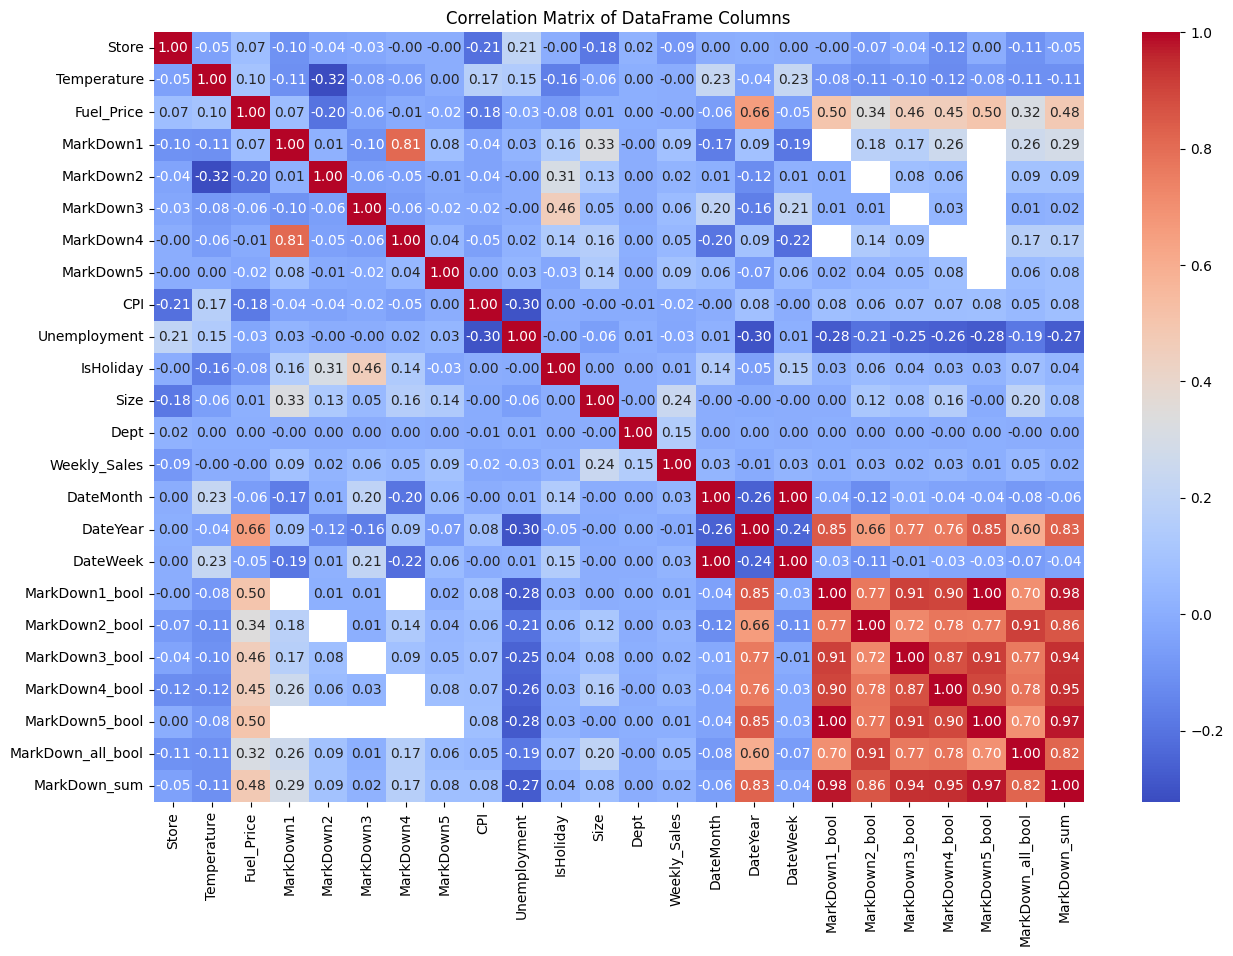

In [49]:
correlation_matrix = merged_stores_features_train.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of DataFrame Columns")
plt.show()


# Model selection

Out of 10 models, we will try to reduce our possibilities throught an step-by-step process.

In [50]:
data_encoded = merged_stores_features_train.copy()
print(f"The shape of the frame is: {data_encoded.shape}")
nan_values = data_encoded.isna().sum()
if np.any(nan_values):
    print("There are missing values in the dataframe:")
    print(nan_values)
else:
    print("No missing values found in the dataframe.")


The shape of the frame is: (536634, 26)
There are missing values in the dataframe:
Store                     0
Date                      0
Temperature               0
Fuel_Price                0
MarkDown1            271038
MarkDown2            338949
MarkDown3            294308
MarkDown4            299491
MarkDown5            270138
CPI                   38162
Unemployment          38162
IsHoliday                 0
Type                      0
Size                      0
Dept                      0
Weekly_Sales         115064
DateMonth                 0
DateYear                  0
DateWeek                  0
MarkDown1_bool            0
MarkDown2_bool            0
MarkDown3_bool            0
MarkDown4_bool            0
MarkDown5_bool            0
MarkDown_all_bool         0
MarkDown_sum              0
dtype: int64


We use one-hot encoding for a varialbe that has 3 potential values, A, B and C.

In [51]:
one_hot = pd.get_dummies(data_encoded['Type'], prefix='Type')
print(data_encoded['Type'].value_counts())
# Concatenate the one-hot encoded columns to the original DataFrame
data_encoded = pd.concat([data_encoded, one_hot], axis=1)

# Drop the original 'category_column'
data_encoded.drop('Type', axis=1, inplace=True)
data_encoded.head(10)

A    274191
B    207995
C     54448
Name: Type, dtype: int64


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Size,Dept,Weekly_Sales,DateMonth,DateYear,DateWeek,MarkDown1_bool,MarkDown2_bool,MarkDown3_bool,MarkDown4_bool,MarkDown5_bool,MarkDown_all_bool,MarkDown_sum,Type_A,Type_B,Type_C
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,151315,1,24924.50,2,2010,5,0,0,0,0,0,0,0,1,0,0
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,151315,1,46039.49,2,2010,6,0,0,0,0,0,0,0,1,0,0
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,151315,1,41595.55,2,2010,7,0,0,0,0,0,0,0,1,0,0
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,151315,1,19403.54,2,2010,8,0,0,0,0,0,0,0,1,0,0
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,151315,1,21827.90,3,2010,9,0,0,0,0,0,0,0,1,0,0
5,1,2010-03-12,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False,151315,1,21043.39,3,2010,10,0,0,0,0,0,0,0,1,0,0
6,1,2010-03-19,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False,151315,1,22136.64,3,2010,11,0,0,0,0,0,0,0,1,0,0
7,1,2010-03-26,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False,151315,1,26229.21,3,2010,12,0,0,0,0,0,0,0,1,0,0
8,1,2010-04-02,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False,151315,1,57258.43,4,2010,13,0,0,0,0,0,0,0,1,0,0
9,1,2010-04-09,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False,151315,1,42960.91,4,2010,14,0,0,0,0,0,0,0,1,0,0


We drop the date column and fill the not defined values with 0. At the same time, we change 'IsHoliday' from boolean to binary and delete the rows that have negative values for 'Weekly_Sales'.

In [94]:
# Eliminate unwanted columns, rows and nan values

local_copy = data_encoded.copy()

final_test_date = local_copy.loc[local_copy['Weekly_Sales'].isna(), ['Date']]

data_encoded_dropped = local_copy.drop(['Date'], axis=1)
print(data_encoded_dropped.shape)

final_test = data_encoded_dropped[data_encoded_dropped['Weekly_Sales'].isna()]
print(final_test.shape)

data_encoded_dropped = data_encoded_dropped.dropna(subset=['Weekly_Sales'])
print(data_encoded_dropped.shape)

data_encoded_dropped = data_encoded_dropped.copy()
data_encoded_dropped.fillna(0, inplace=True)
data_encoded_dropped['IsHoliday'] = data_encoded_dropped['IsHoliday'].astype(int)
data_encoded_dropped = data_encoded_dropped[data_encoded_dropped['Weekly_Sales'] >= 0]

print(f"The shape of the frame is: {data_encoded_dropped.shape}")
nan_values = data_encoded_dropped.isna().sum()
if np.any(nan_values):
    print("There are missing values in the dataframe:")
    print(nan_values)
else:
    print("No missing values found in the dataframe.")

(536634, 27)
(115064, 27)
(421570, 27)
The shape of the frame is: (420285, 27)
No missing values found in the dataframe.


In [95]:
print(final_test.shape)
final_test = final_test.copy()
final_test.fillna(0, inplace=True)
final_test['IsHoliday'] = final_test['IsHoliday'].astype(int)

print(f"The shape of the frame is: {final_test.shape}")
nan_values = final_test.isna().sum()
if np.any(nan_values):
    print("There are missing values in the dataframe:")
    print(nan_values)
else:
    print("No missing values found in the dataframe.")


(115064, 27)
The shape of the frame is: (115064, 27)
No missing values found in the dataframe.


In [59]:
final_test.shape

(115064, 27)

In [60]:
final_dataset = data_encoded_dropped.copy()
print(final_dataset.shape)
final_dataset.head()

(420285, 27)


,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Size,Dept,Weekly_Sales,DateMonth,DateYear,DateWeek,MarkDown1_bool,MarkDown2_bool,MarkDown3_bool,MarkDown4_bool,MarkDown5_bool,MarkDown_all_bool,MarkDown_sum,Type_A,Type_B,Type_C
0,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315,1,24924.50,2,2010,5,0,0,0,0,0,0,0,1,0,0
1,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,1,151315,1,46039.49,2,2010,6,0,0,0,0,0,0,0,1,0,0
2,1,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,151315,1,41595.55,2,2010,7,0,0,0,0,0,0,0,1,0,0
3,1,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,151315,1,19403.54,2,2010,8,0,0,0,0,0,0,0,1,0,0
4,1,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,151315,1,21827.90,3,2010,9,0,0,0,0,0,0,0,1,0,0


In [61]:
# Separate the target variable, which is 'Weekly_Sales' from the rest of the independent variables.
local_copy = final_dataset.copy()
X = local_copy.drop(columns=['Weekly_Sales'])
y = local_copy['Weekly_Sales']

columns = X.columns.tolist()

# we choose a random state to have deterministic results
RANDOM_STATE = 42

In [ ]:
# Normalise the data
#scaler = StandardScaler()
#X = scaler.fit_transform(X)

In [62]:
# We take a smaller amount of entries since otherwise it would take too long the cross-validation
print(X.shape)
X = X
y = y
X.shape

(420285, 26)


(420285, 26)

We conclude that the best models are the ones are decision tree based, those being Random Forest, GBR. DT, XGBR and LGMR. To get the obtained results, we used only the first 10.000 entries from the dataset.

| Model                       | MAE                   | MSE                   | RMSE                  |
|-----------------------------|-----------------------|-----------------------|-----------------------|
| LinearRegression            | -31605.025780217296   | -1749320467.146405    | -39515.98897204471    |
| Ridge                       | -31581.464270959685   | -1747026751.0021677   | -39488.036493781576   |
| Lasso                       | -31584.920628255855   | -1747331999.3107493   | -39491.324089957285   |
| RandomForestRegressor       | -18036.222145124906   | -897320071.8357482    | -27222.683433713348   |
| GradientBoostingRegressor   | -18147.153477958833   | -928566088.6647352    | -27631.65438474217    |
| SVR                         | -20362.25702104495    | -998539658.8639685    | -28820.81155447187    |
| KNeighborsRegressor         | -18785.379105455297   | -1011746666.3254641   | -28798.32158705271    |
| DecisionTreeRegressor       | -18045.539722923404   | -907686592.5322065    | -27313.763226015395   |
| XGBRegressor                | -17872.842195024685   | -894993768.2777478    | -27097.2339304324     |
| LGBMRegressor               | -17938.052516600994   | -903854237.9042163    | -27235.176652995273   |


In [ ]:
'''
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


# Define 10 models used just for regression
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'RandomForestRegressor': RandomForestRegressor(), #
    'GradientBoostingRegressor': GradientBoostingRegressor(), #
    'SVR': SVR(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(), #
    'XGBRegressor': XGBRegressor(), #
    'LGBMRegressor': LGBMRegressor() #
}

# Metrics
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Cross-validation settings
cv = 3  # Number of folds

# Loop through models
for name, model in models.items():
    mae = -cross_val_score(model, X, y, cv=cv, scoring=make_scorer(mean_absolute_error)).mean()
    print(f"{name}: MAE = {mae}")
    mse = -cross_val_score(model, X, y, cv=cv, scoring=make_scorer(mean_squared_error)).mean()
    print(f"{name}: MSE = {mse}")
    _rmse = -cross_val_score(model, X, y, cv=cv, scoring=make_scorer(rmse)).mean()
    print(f"{name}: RMSE = {_rmse}")
'''

Now, we take the first 5 algortihms that gave the best results and we test them over the entire dataset.

| Model                 | MAE       | MSE         | RMSE      |
|-----------------------|-----------|-------------|-----------|
| RandomForestRegressor | 1665.590  | 19780305.956| 4447.506  |
| GradientBoostingRegressor | 6929.285 | 135119982.445 | 11624.112 |
| DecisionTreeRegressor | 2045.942  | 28675149.909 | 5354.918  |
| XGBRegressor          | 3063.877  | 32332000.665 | 5686.124  |
| LGBMRegressor         | 4129.850  | 50148444.643 | 7081.557  |

From this table, we observe that Decision Tree and Random Forest obtained the best results. We will continue to improve their performance by doing hyperparameter tunning.

In [ ]:
'''
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


models = {
    'RandomForestRegressor': RandomForestRegressor()
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'XGBRegressor': XGBRegressor(),
    'LGBMRegressor': LGBMRegressor()
}



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Loop through each model, fit, predict and calculate metrics
for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict on the testing set
    y_pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    _rmse = rmse(y_test, y_pred)

    # Print metrics
    print(f"{name}: MAE = {mae:.3f}, MSE = {mse:.3f}, RMSE = {_rmse:.3f}")
'''

# Hyperparameter tunning
We use 2 methods for this. For Decision Tree we use Grid Search with cross-validation, since it checks for all given parameters combination and because of the nature of the Decision Tree in terms of computational necessities.

On the flip side, for Random Forest we use Randomised Search with cross-validation, since we have limited computational power and doing the hyperparameter tunning with Grid Search would take several hours. On the flip side, Random Search is randomly searching for the best set of hyperparameters, giving us more control over the number of performed searches.

In [ ]:
'''
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
# Example dataset
X_train, X_test, y_train, y_test = train_test_split(X[:2000], y[:2000], test_size=0.2, random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', None],
}

# Initialize the model
rf = RandomForestRegressor()
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Initialize Grid Search
#grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring=mae_scorer)

#Fit the grid search to the data
#grid_search.fit(X_train, y_train)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(rf, param_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1, scoring=mae_scorer)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Print the best parameters and corresponding MAE
#print("Best parameters:", grid_search.best_params_)
print("Best parameters:", random_search.best_params_)
print("Best MAE:", -random_search.best_score_)
Best current set: n_estimators = 400, min_samples_split= 2, min_samples_leaf = 2, max_depth =  40
'''

In [ ]:
'''
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor


param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [10, 20, 30],  # Maximum number of levels in tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

# Calculate the proportion of the dataset that corresponds to 10,000 samples
sample_size = 10000
total_size = len(y)  # Assuming y is a one-dimensional array-like object
train_size = sample_size / total_size

# Use train_test_split to randomly sample 10,000 observations
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=train_size, random_state=42)

print(X_sample.shape)

X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)


model = ExtraTreesRegressor(random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=2, n_jobs=-1, verbose=3)


# Assuming X_train and y_train are your training data and labels
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

print("Best Parameters:", best_params)
'''
# 3 min 20s

In [ ]:
'''
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(X[:10000], y[:10000], test_size=0.2, random_state=42)


param_grid = {
    'max_depth': [10,20,30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [None, 10, 20, 30]
}

# Initialize the model
dt = DecisionTreeRegressor()

# Initialize Grid Search
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X, y)

# Best parameters
print("Best parameters:", grid_search.best_params_)
# Best parameters: {'max_depth': 20, 'max_leaf_nodes': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
'''
X

# Final models and the best results

In the end, we try to improve the results as much as possible, focusing of the MAE metric.

In [ ]:
'''
RandomForestRegressor: MAE = 1835.251, MSE = 24328893.169, RMSE = 4932.433 (100000)
RandomForestRegressor: MAE = 1916.157, MSE = 25462681.410, RMSE = 5046.056 (200000)
RandomForestRegressor: MAE = 1665.590, MSE = 19780305.956, RMSE = 4447.506 (all)
RandomForestRegressor: MAE = 1598.710, MSE = 16944745.578, RMSE = 4116.400 - all the variables
Last RF results: RandomForestRegressor: MAE = 1613.707, MSE = 18175147.178, RMSE = 4263.232, WMAE= 1841.388 (no negative values)
Last RF results: RandomForestRegressor: MAE = 1598.710, MSE = 16944745.578, RMSE = 4116.400, WMAE= 1826.402 (with negative values)

RandomForestRegressor: MAE = 1613.707, MSE = 18175147.178, RMSE = 4263.232, WMAE= 1841.388

RandomForestRegressor: MAE = 1444.794, MSE = 12595218.900, RMSE = 3548.974, WMAE= 1647.674 ( with year and date)

no hyper - RandomForestRegressor: MAE = 1653.703, MSE = 18299575.451, RMSE = 4277.800 (scaler)
hyper: RF RandomForestRegressor: MAE = 1699.854, MSE = 20073337.688, RMSE = 4480.328
RandomForestRegressor: MAE = 1672.887, MSE = 19922150.851, RMSE = 4463.424 (n_estimators = 200, max_depth = 30, min_samples_leaf =  2, min_samples_split = 2)

DecisionTreeRegressor: MAE = 2045.942, MSE = 28675149.909, RMSE = 5354.918
DecisionTreeRegressor: MAE = 1894.033, MSE = 26096507.344, RMSE = 5108.474 ( after hyper)

'''
X


In [90]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import ExtraTreesRegressor, ExtraTreesClassifier

models = {
    # Uncomment and add a comma if you want to include these models
    # 'ExtraTreesRegressor': ExtraTreesRegressor(max_depth =  40, min_samples_leaf = 1, min_samples_split = 5, n_estimators = 400, random_state=42, n_jobs=-1 ),
     'RandomForestRegressor': RandomForestRegressor(max_depth =  40, min_samples_leaf = 1, min_samples_split = 5, n_estimators = 200, random_state=42, n_jobs=-1),
    # 'DecisionTreeRegressor': DecisionTreeRegressor(max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=2),
}




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

# Function to calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def wmae_test(test, pred): # WMAE for test
    weights = X_test['IsHoliday'].apply(lambda is_holiday:5 if is_holiday else 1)
    error = np.sum(weights * np.abs(test - pred), axis=0) / np.sum(weights)
    return error

# Loop through each model, fit, predict and calculate metrics
for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict on the testing set
    y_pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    _rmse = rmse(y_test, y_pred)
  #  wmae = wmae_test(y_test, y_pred)

    # Print metrics
    print(f"{name}: MAE = {mae:.3f}, MSE = {mse:.3f}, RMSE = {_rmse:.3f}, WMAE= {'''wmae:.3f'''}")


RandomForestRegressor: MAE = 1440.771, MSE = 12608093.030, RMSE = 3550.788, WMAE= wmae:.3f


In [91]:
def wmae_test(test, pred): # WMAE for test
    weights = X_test['IsHoliday'].apply(lambda is_holiday:5 if is_holiday else 1)
    error = np.sum(weights * np.abs(test - pred), axis=0) / np.sum(weights)
    return error

wmae = wmae_test(y_test, y_pred)
print(wmae)

1549.5203599567033


In [93]:
X_final.isna().sum()

Store                    0
Temperature              0
Fuel_Price               0
MarkDown1              149
MarkDown2            28627
MarkDown3             9829
MarkDown4            12888
MarkDown5                0
CPI                  38162
Unemployment         38162
IsHoliday                0
Size                     0
Dept                     0
DateMonth                0
DateYear                 0
DateWeek                 0
MarkDown1_bool           0
MarkDown2_bool           0
MarkDown3_bool           0
MarkDown4_bool           0
MarkDown5_bool           0
MarkDown_all_bool        0
MarkDown_sum             0
Type_A                   0
Type_B                   0
Type_C                   0
dtype: int64

In [96]:
local_copy = final_test.copy()
X_final = local_copy.drop(columns=['Weekly_Sales'])


y_final_pred = model.predict(X_final)

In [97]:
y_final_pred

array([32237.95895892, 20127.11791714, 18846.05678073, ...,
         450.85461925,   472.79090327,   487.54512244])

In [98]:
final_submission = X_final.copy()
final_submission['Id'] = final_submission['Store'].astype(str) + '_' + final_submission['Dept'].astype(str) + '_' + final_test_date['Date'].astype(str)
final_submission['Weekly_Sales'] = y_final_pred

In [99]:
final_submission = final_submission[['Id', 'Weekly_Sales']]
print(final_submission.shape)
final_submission.reset_index(drop=True, inplace=True)

final_submission.head()

(115064, 2)


,Id,Weekly_Sales
0,1_1_2012-11-02,32237.958959
1,1_1_2012-11-09,20127.117917
2,1_1_2012-11-16,18846.056781
3,1_1_2012-11-23,20123.417791
4,1_1_2012-11-30,20774.120528


In [100]:
from google.colab import files
csv_filename = 'submission_Walmart.csv'
final_submission.to_csv(csv_filename, index=False)  # Set index=False to exclude index from the CSV

# Download the file
files.download(csv_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [86]:
print(sampleSubmission.shape)
sampleSubmission.head()

(115064, 2)


,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0


In [80]:
print(X_final.shape)
print(final_test_date.shape)

(115064, 26)
(115064, 1)


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import ExtraTreesRegressor, ExtraTreesClassifier


X_final = final_test.copy()

rfRegressor = RandomForestRegressor(max_depth =  40, min_samples_leaf = 1, min_samples_split = 5, n_estimators = 200, random_state=42, n_jobs=-1),

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def wmae_test(test, pred): # WMAE for test
    weights = X_test['IsHoliday'].apply(lambda is_holiday:5 if is_holiday else 1)
    error = np.sum(weights * np.abs(test - pred), axis=0) / np.sum(weights)
    return error

rfRegressor.fit(X_train, y_train)

y_pred = rfRegressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
_rmse = rmse(y_test, y_pred)
wmae = wmae_test(y_test, y_pred)

print(f"{name}: MAE = {mae:.3f}, MSE = {mse:.3f}, RMSE = {_rmse:.3f}, WMAE= {'''wmae:.3f'''}")


y_final_pred = rfRegressor.predict(X_final)




In [ ]:
'''
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[:10000], y[:10000], test_size=0.2, random_state=42)

# Create a RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Lists to store results
mse_scores = []
feature_sets = []

# Perform RFE manually and store the MSE and selected features for each subset
for i in range(1, X_train.shape[1] + 1):
    rfe = RFE(estimator=regressor, n_features_to_select=i)
    rfe.fit(X_train, y_train)
    y_pred = rfe.predict(X_test)
    mse_scores.append(mean_squared_error(y_test, y_pred))
    feature_sets.append(rfe.support_)

# Plotting the MSE scores
plt.figure()
plt.plot(range(1, len(mse_scores) + 1), mse_scores, marker='o')
plt.xlabel('Number of Features Selected')
plt.ylabel('Mean Squared Error')
plt.title('RFE with RandomForestRegressor')
plt.show()

feature_names = X.columns

# Print feature names and their corresponding MSE scores
for i, (features, mse) in enumerate(zip(feature_sets, mse_scores), start=1):
    selected_features = feature_names[features]
    print(f"Number of Features: {i}")
    print(f"Selected Features: {selected_features.tolist()}")
    print(f"MSE: {mse}\n")
'''

In [ ]:
'''
LinearRegression: MAE = 14585.146, MSE = 473937973.878, RMSE = 21770.117, WMAE= 14818.879
Ridge: MAE = 14585.143, MSE = 473937980.133, RMSE = 21770.117, WMAE= 14818.876
Lasso: MAE = 14584.948, MSE = 473940400.653, RMSE = 21770.172, WMAE= 14817.604
RandomForestRegressor: MAE = 1598.710, MSE = 16944745.578, RMSE = 4116.400, WMAE= 1826.402
GradientBoostingRegressor: MAE = 6967.398, MSE = 138636857.468, RMSE = 11774.415, WMAE= 7186.067

RandomForestRegressor: MAE = 1597.386, MSE = 17089149.205, RMSE = 4133.902, WMAE= 1824.987 (max_depth =  40, min_samples_leaf = 1, min_samples_split = 5, n_estimators = 400, random_state=42, n_jobs=-1)
RandomForestRegressor: MAE = 1596.931, MSE = 17099905.303, RMSE = 4135.203, WMAE= 1824.321 (450 estimators)


ExtraTreesRegressor: MAE = 1791.737, MSE = 24180380.158, RMSE = 4917.355, WMAE= 2116.177 (50%)
ExtraTreesRegressor: MAE = 1748.018, MSE = 23510874.778, RMSE = 4848.801, WMAE= 2069.586 (40% training set)
ExtraTreesRegressor: MAE = 1680.730, MSE = 20738514.394, RMSE = 4553.956, WMAE= 1951.812 (25% training set)
ExtraTreesRegressor: MAE = 1656.884, MSE = 19531266.348, RMSE = 4419.419, WMAE= 1905.813 (20% training set)
ExtraTreesRegressor: MAE = 1633.253, MSE = 18598437.898, RMSE = 4312.591, WMAE= 1884.463 (15% training set)
ExtraTreesRegressor: MAE = 1614.769, MSE = 20127770.558, RMSE = 4486.398, WMAE= 1869.112 (10% training set)
ExtraTreesRegressor: MAE = 1630.370, MSE = 18962821.410, RMSE = 4354.632, WMAE= 1859.375 (5% training set)

ExtraTreesRegressor: MAE = 1693.503, MSE = 19799648.584, RMSE = 4449.680, WMAE= 1927.817
ExtraTreesRegressor: MAE = 1627.985, MSE = 19124159.157, RMSE = 4373.118, WMAE= 1863.064
ExtraTreesRegressor: MAE = 1626.555, MSE = 18989205.894, RMSE = 4357.661, WMAE= 1859.722


'''

In [ ]:
'''
feature_importances = model.feature_importances_
# Sort the feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
feature_names = X.columns

plt.figure(figsize=(12, 6))
plt.title("Feature Importances in RandomForestRegressor")
plt.bar(range(X.shape[1]), feature_importances[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()
# For RF:Dept, Size,Store,CPI, DateMonth
# For DT: Dept, Size,Store,DateMonth, CPI
'''

In [ ]:
'''
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor  # Example model

# 1. Performance on Training vs. Test Data
train_preds = model.predict(X_train)
train_mae = mean_absolute_error(y_train, train_preds)
train_mse = mean_squared_error(y_train, train_preds)
train_rmse = mean_squared_error(y_train, train_preds, squared=False)

test_preds = model.predict(X_test)
test_mae = mean_absolute_error(y_test, test_preds)
test_mse = mean_squared_error(y_test, test_preds)
test_rmse = mean_squared_error(y_test, test_preds, squared=False)

# Compare the results
print("Training MAE:", train_mae, "Test MAE:", test_mae)
print("Training MSE:", train_mse, "Test MSE:", test_mse)
print("Training RMSE:", train_rmse, "Test RMSE:", test_rmse)

# 2. Cross-Validation
#cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
#print(f"Cross-Validation MSE: {-np.mean(cv_scores)}")
'''
'''
# 3. Learning Curves
def plot_learning_curve(model, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='neg_mean_squared_error')

    train_scores_mean = np.mean(-train_scores, axis=1)
    test_scores_mean = np.mean(-test_scores, axis=1)

    plt.grid()
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()

plot_learning_curve(model, X_train, y_train, cv=2)


Training MAE: 744.6320500048191 Test MAE: 1597.3856859495936
Training MSE: 4145897.5364698907 Test MSE: 17089149.2054538
Training RMSE: 2036.1477197074605 Test RMSE: 4133.902418472622


Training MAE: 744.213869015973 Test MAE: 1596.9306456734746
Training MSE: 4130695.124638668 Test MSE: 17099905.302565783
Training RMSE: 2032.411160331164 Test RMSE: 4135.203175487969

'''



In [ ]:
'''
Training MAE: 590.0615262634285 Test MAE: 1598.7104506513438
Training MSE: 2445368.268799687 Test MSE: 16944745.577740937
Training RMSE: 1563.7673320541285 Test RMSE: 4116.399589172672

DT
Training MAE: 1196.197909899918 Test MAE: 1919.5551090220606
Training MSE: 9265828.219579112 Test MSE: 26873035.466473207
Training RMSE: 3043.9822962000144 Test RMSE: 5183.920858430731
'''

In [ ]:
'''!pip install auto-sklearn
import autosklearn.regression

X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)


# Create and fit the model
automl = autosklearn.regression.AutoSklearnRegressor(time_left_for_this_task=120, per_run_time_limit=30)
automl.fit(X_train, y_train)

# Evaluate
y_pred = automl.predict(X_test)
print("Test MSE:", mean_squared_error(y_test, y_pred))
'''

In [ ]:
'''
!sudo apt-get install build-essential swig
!pip install numpy cython
'''

In [ ]:
#!pip install auto-sklearn